In [30]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import root_mean_squared_error as RMSE
import matplotlib.pyplot as plt

In [31]:
rhob10 = pd.read_csv(r"C:\Users\Ольга\Downloads\rhob_10.csv")
rhob30 = pd.read_csv(r"C:\Users\Ольга\Downloads\rhob_30.csv")
rhob50 = pd.read_csv(r"C:\Users\Ольга\Downloads\rhob_50.csv")

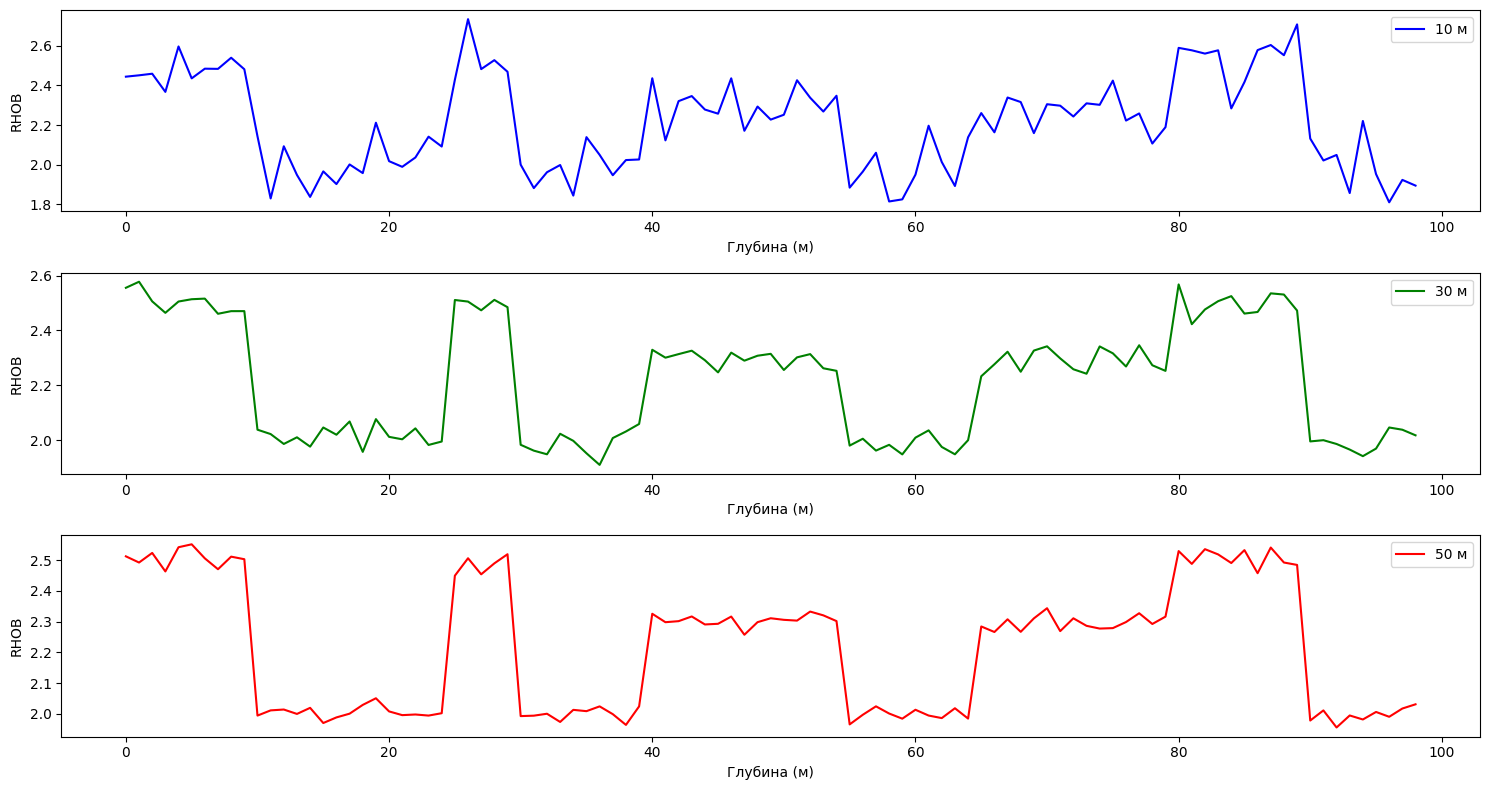

In [32]:
plt.figure(figsize=(15, 8))  

depth = np.arange(len(rhob10))

plt.subplot(3, 1, 1) 
plt.plot(depth, rhob10, 'b-', label='10 м')
plt.legend()
plt.xlabel('Глубина (м)')
plt.ylabel('RHOB')

plt.subplot(3, 1, 2)  # второй график
plt.plot(depth, rhob30, 'g-', label='30 м')
plt.legend()
plt.xlabel('Глубина (м)')
plt.ylabel('RHOB')

plt.subplot(3, 1, 3)  # третий график
plt.plot(depth, rhob50, 'r-', label='50 м')
plt.legend()
plt.xlabel('Глубина (м)')
plt.ylabel('RHOB')
plt.tight_layout() 
plt.show()

# Метод k-ближайших соседей

In [33]:
def approximate_values(values, num_groups):
   
    model = KMeans(n_clusters=num_groups, random_state=0)
    prepared_data = values.reshape(-1, 1)
    model.fit(prepared_data)
    group_centers = model.cluster_centers_.flatten()
    group_labels = model.predict(prepared_data)
    result = np.array([group_centers[label] for label in group_labels])
    
    return result

In [44]:
def process_density(data, clusters=3):
    data_reshaped = data.values.reshape(-1, 1)
    kmeans = KMeans(n_clusters=clusters, random_state=0)
    kmeans.fit(data_reshaped)
    centers = kmeans.cluster_centers_.flatten()
    labels = kmeans.predict(data_reshaped)
    return np.array([centers[label] for label in labels])

# Обрабатываем все наборы данных
rhob10_processed = process_density(rhob10)
rhob30_processed = process_density(rhob30)
rhob50_processed = process_density(rhob50)

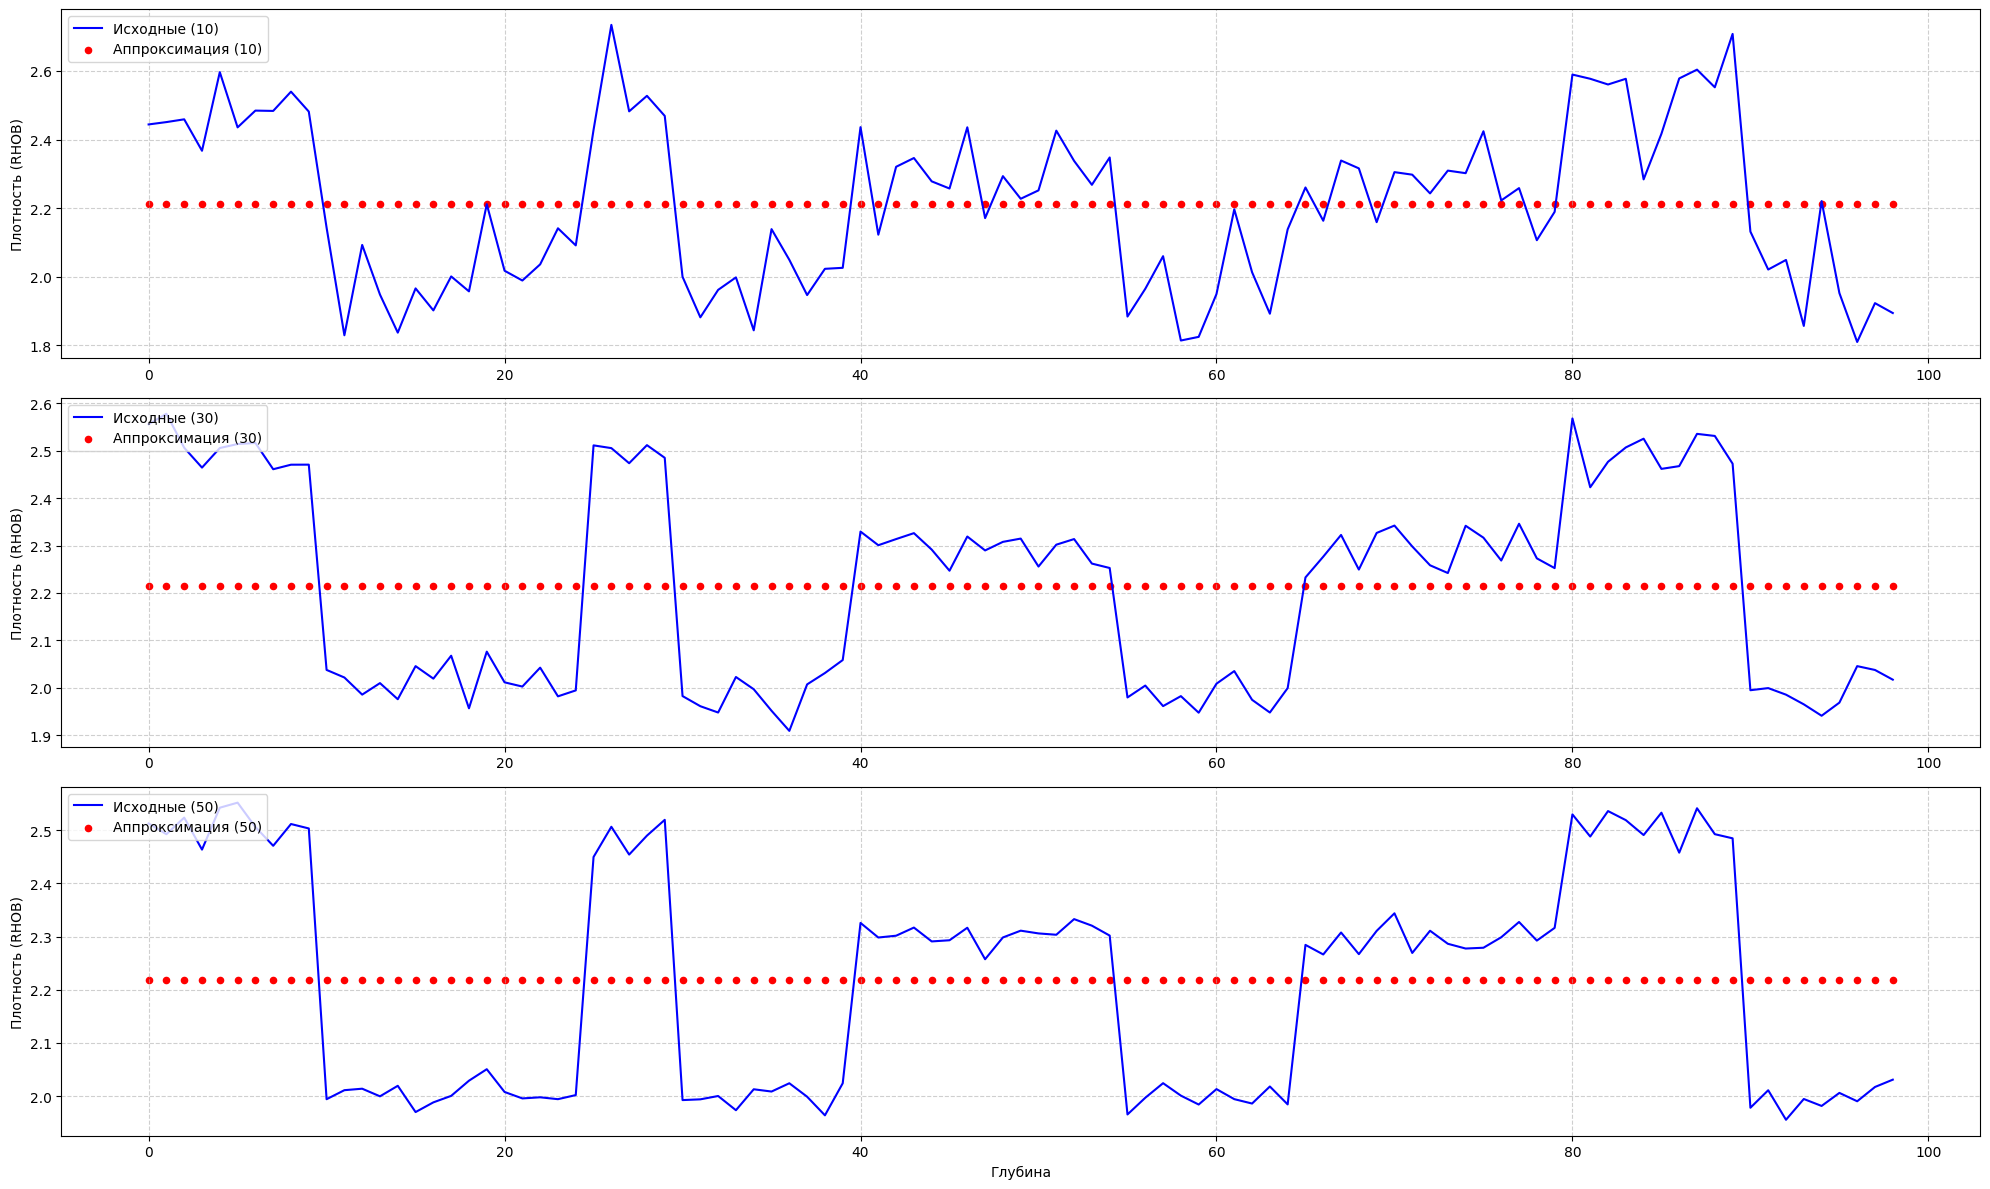

In [45]:
plt.figure(figsize=(20, 12))  

depth_points = np.arange(len(rhob10))  
datasets = [rhob10, rhob30, rhob50]
names = ['10', '30', '50']

# Строим графики для каждого набора данных
for i in range(3):
    plt.subplot(3, 1, i+1)  
    plt.plot(depth_points, datasets[i], 'b-', label=f'Исходные ({names[i]})')
    
    # Предсказанные значения (1 кластер)
    predicted = process_density(datasets[i], 1)
    plt.scatter(depth_points, predicted, c='r', s=20, label=f'Аппроксимация ({names[i]})')
   
    plt.ylabel('Плотность (RHOB)')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.xlabel('Глубина')
plt.tight_layout()
plt.show()

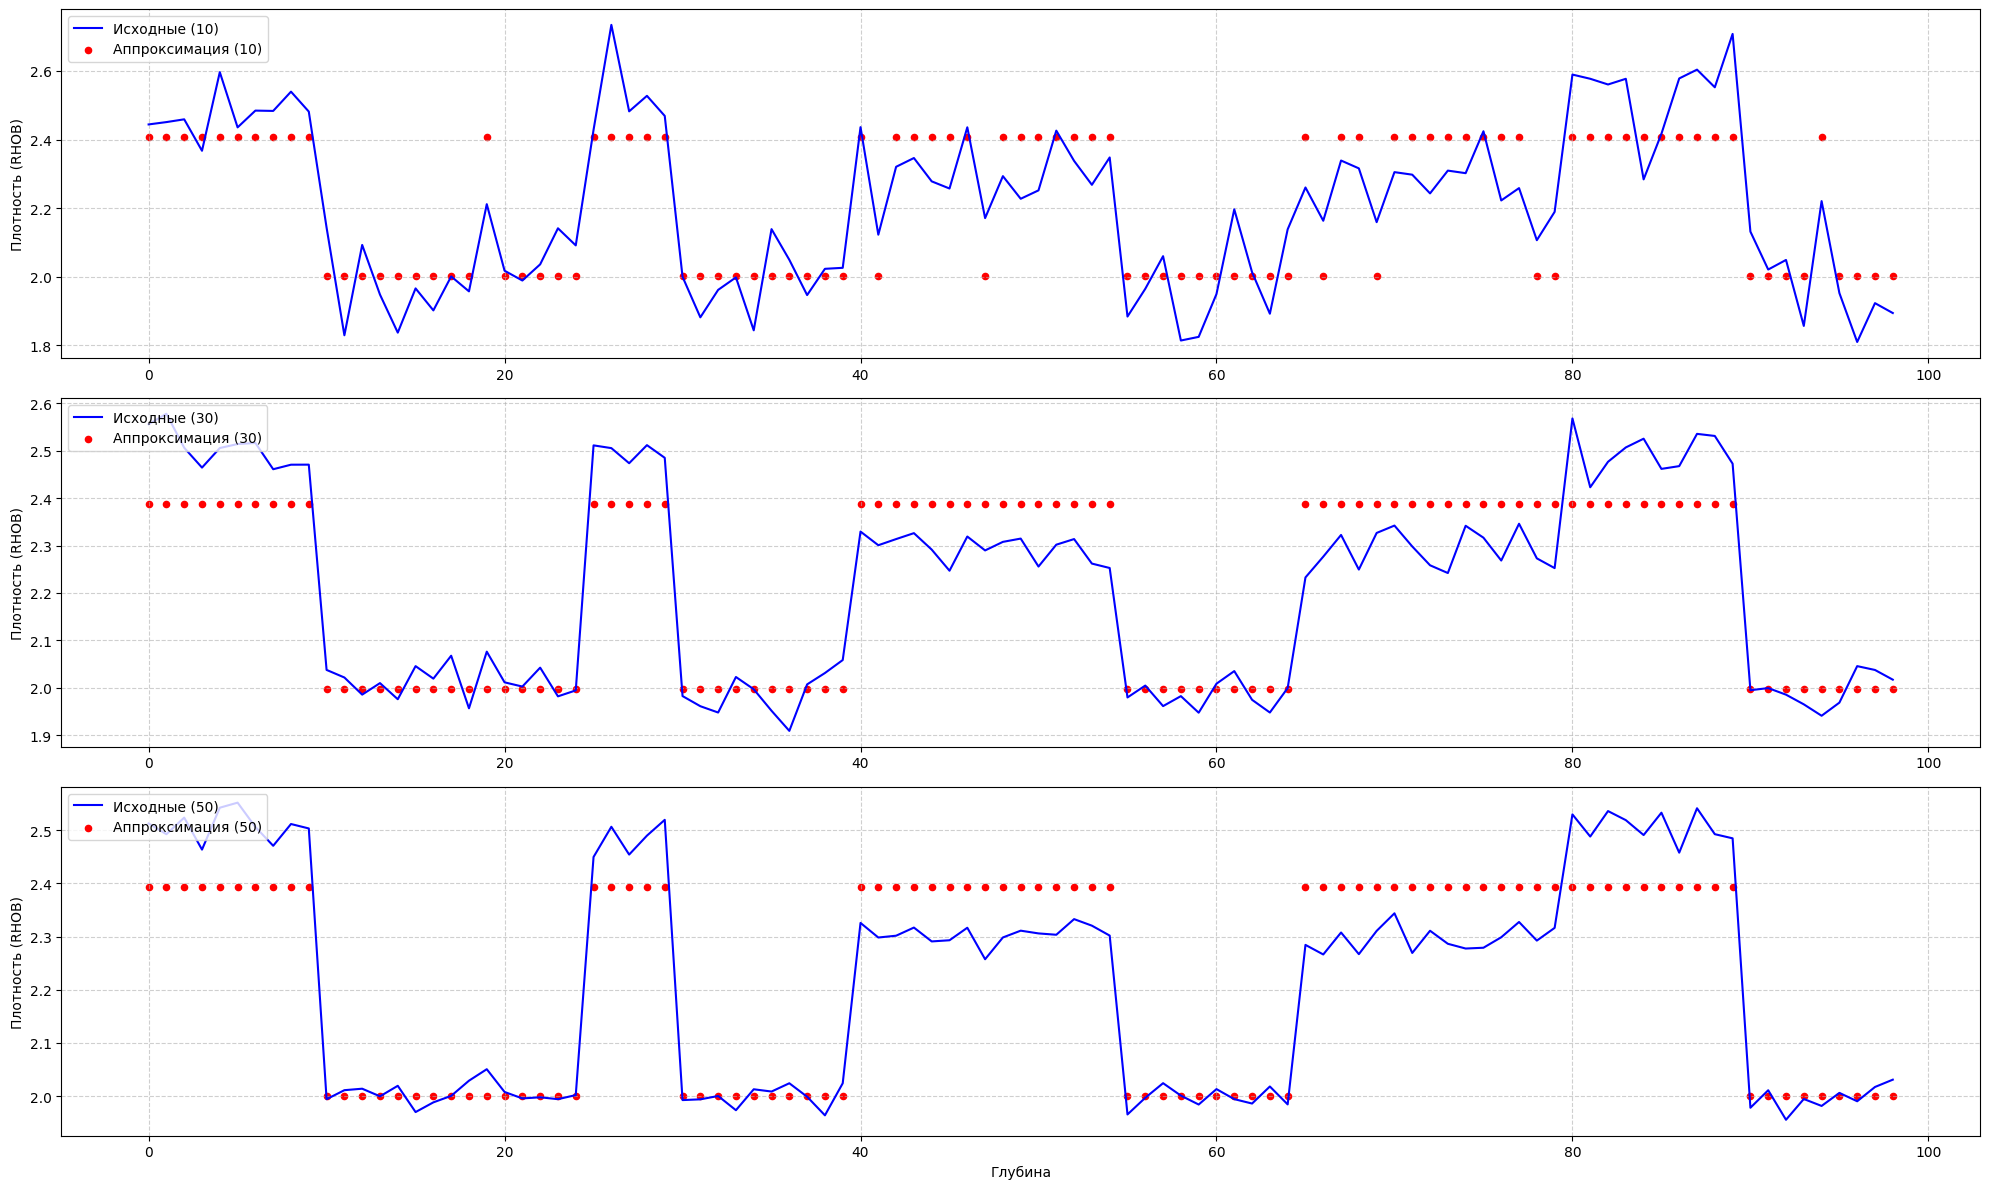

In [46]:
plt.figure(figsize=(20, 12))  


depth_points = np.arange(len(rhob10)) 
datasets = [rhob10, rhob30, rhob50]
names = ['10', '30', '50']

# Строим графики для каждого набора данных
for i in range(3):
    plt.subplot(3, 1, i+1)  
    plt.plot(depth_points, datasets[i], 'b-', label=f'Исходные ({names[i]})')
    
    # Предсказанные значения (2 кластера)
    predicted = process_density(datasets[i], 2)
    plt.scatter(depth_points, predicted, c='r', s=20, label=f'Аппроксимация ({names[i]})')

    plt.ylabel('Плотность (RHOB)')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.xlabel('Глубина')
plt.tight_layout()
plt.show()

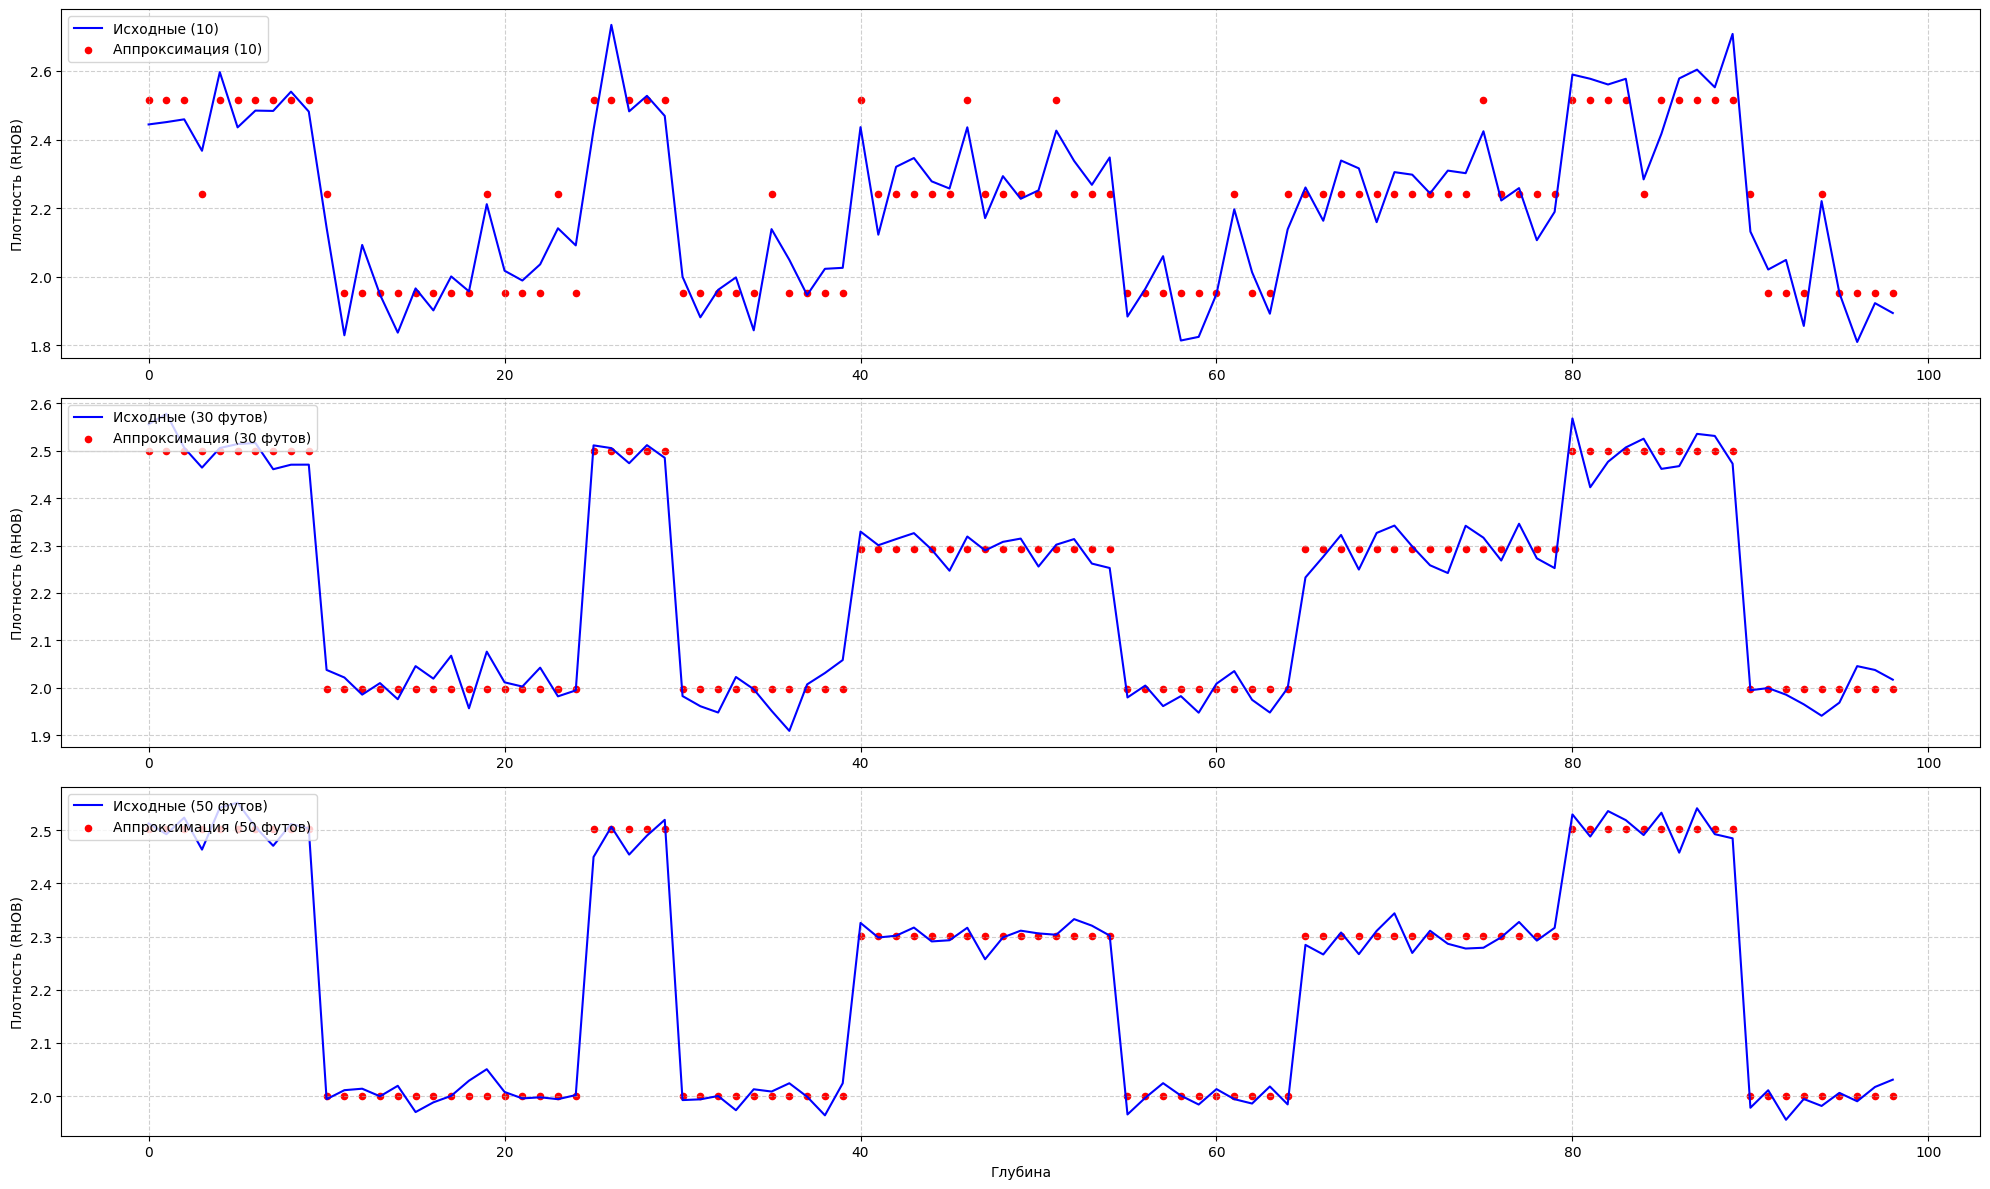

In [47]:
plt.figure(figsize=(20, 12)) 

depth_points = np.arange(len(rhob10))  
datasets = [rhob10, rhob30, rhob50]
names = ['10', '30 футов', '50 футов']

# Строим графики для каждого набора данных
for i in range(3):
    plt.subplot(3, 1, i+1)  
    plt.plot(depth_points, datasets[i], 'b-', label=f'Исходные ({names[i]})')
    
    # Предсказанные значения (3 кластера)
    predicted = process_density(datasets[i], 3)
    plt.scatter(depth_points, predicted, c='r', s=20, label=f'Аппроксимация ({names[i]})')
    
    plt.ylabel('Плотность (RHOB)')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.xlabel('Глубина')
plt.tight_layout()
plt.show()

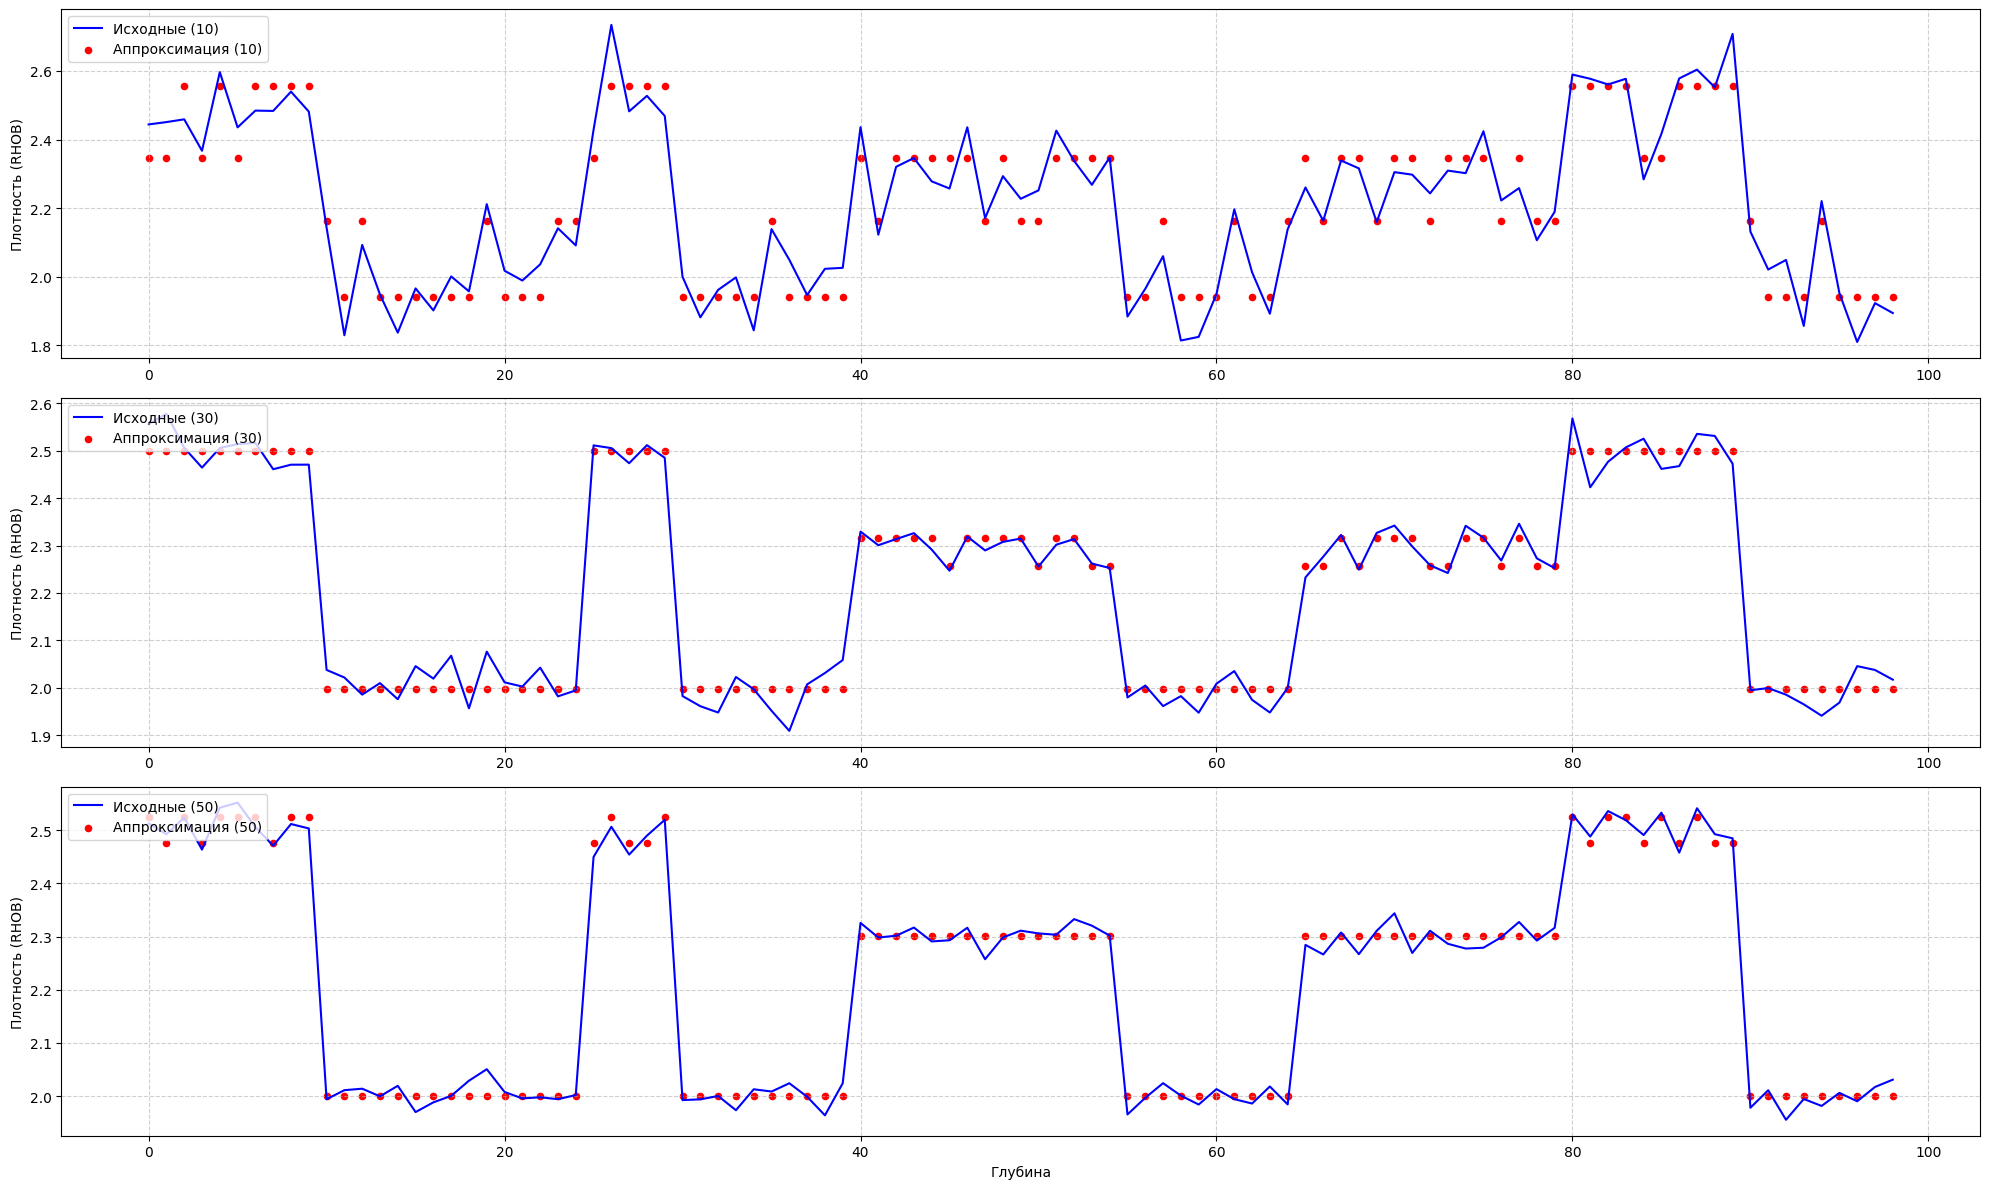

In [48]:
plt.figure(figsize=(20, 12))  

depth_points = np.arange(len(rhob10)) 
datasets = [rhob10, rhob30, rhob50]
names = ['10', '30', '50']

# Строим графики для каждого набора данных
for i in range(3):
    plt.subplot(3, 1, i+1)  
    plt.plot(depth_points, datasets[i], 'b-', label=f'Исходные ({names[i]})')
    
    # Предсказанные значения (4 кластера)
    predicted = process_density(datasets[i], 4)
    plt.scatter(depth_points, predicted, c='r', s=20, label=f'Аппроксимация ({names[i]})')
    
    plt.ylabel('Плотность (RHOB)')
    plt.legend(loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.xlabel('Глубина')
plt.tight_layout()
plt.show()

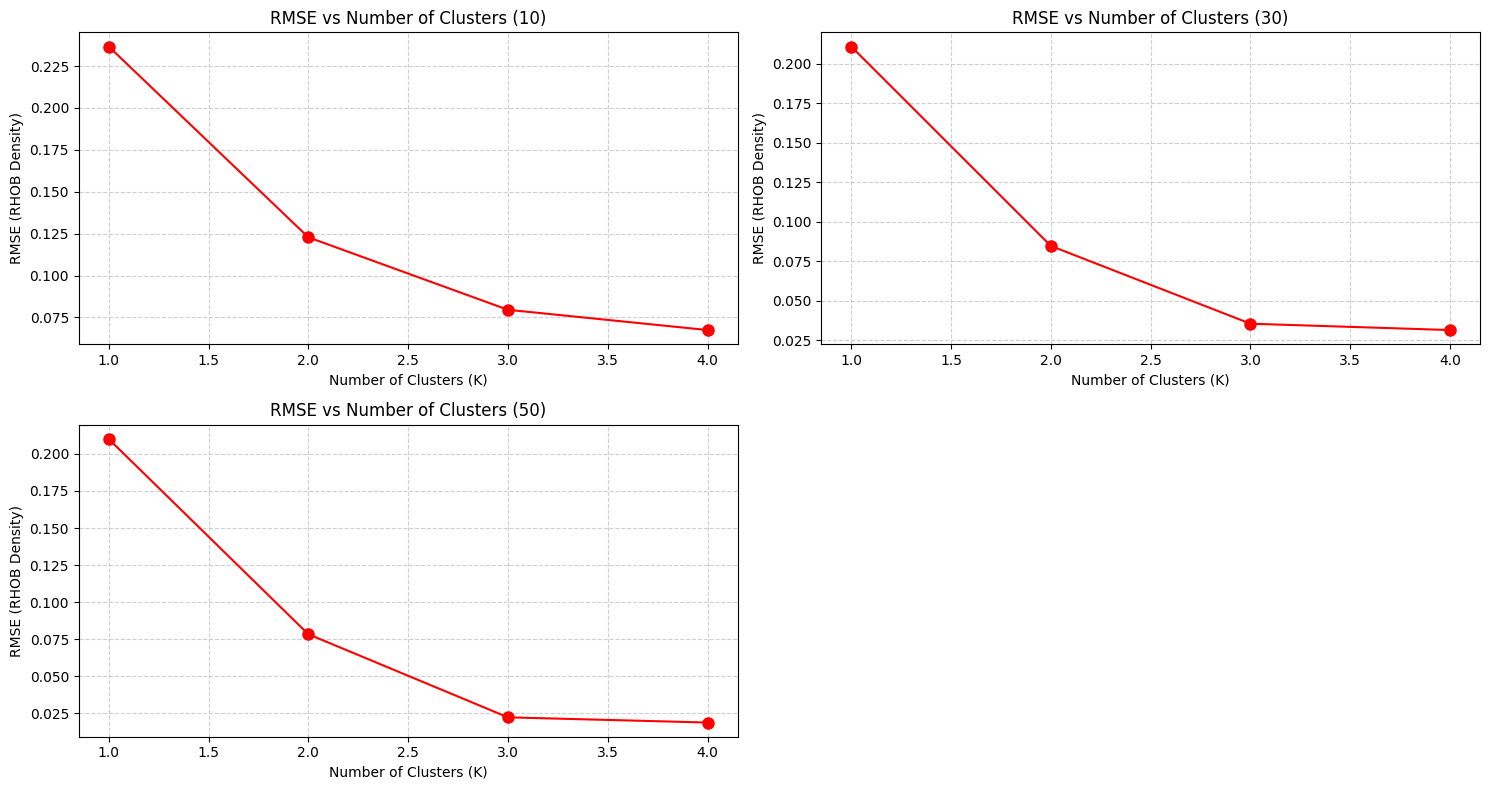

In [42]:
def calculate_rmse(data, max_clusters=4):
    rmse = []
    for n in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=n, random_state=42)
        data_values = data.values.reshape(-1, 1)  
        kmeans.fit(data_values)
        predicted = kmeans.cluster_centers_[kmeans.labels_].flatten()
        rmse.append(np.sqrt(mean_squared_error(data_values.flatten(), predicted)))
    return rmse

plt.figure(figsize=(15, 8))
for i, (name, data) in enumerate(datasets.items(), 1):
    rmse = calculate_rmse(data)
    
    plt.subplot(2, 2, i)
    plt.plot(range(1, 5), rmse, 'ro-', markersize=8)
    plt.title(f'RMSE vs Number of Clusters ({name})')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('RMSE (RHOB Density)')
    plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

### Как мы видим, для rhob 30 и rhob 50 точно можно остановиться на 3-м разбиении, для rhob 10  либо на 2, либо на 3 (лучше на 3-м, так как при 2-х разбиениях теряется часть информации)